<div id="instructions" style="border-radius: 5px; background-color:#f5f5f5;" >
<h1>Instructions</h1>
<p>Look for the <b>9 Your Turn</b> sections to complete the code and/or answer questions.<p>
</div>

# Lesson 4 - Introduction to Hypothesis Testing

## Introduction

This note book introduces you to the concepts of classical hypothesis testing. Specifically, this notebook covers the following cases:

- Two sample tests for continuous variables
- Two sample tests for categorical or count data
- Test for distributions

At the conclusion of this lesson you should be able apply basic classical hypothesis tests to some common situations. 


### Examples of Hypothesis Tests

What is a practical scenario of using hypothesis tests methods?

- **Identify a hypothesis that can be tested:** Using a larger logo on our web site will drive significantly more traffic.
- **Select a criteria to evaluate the hypothesis:** If our sample has a probability of $>= 90\%$ chance that the increase could be caused by randomness alone, we will reject the null hypothesis that the logo does not matter.
- **Select a random sample from the population:** Randomly assign a cookie to new site users that tells the server to show A or B website.
- **Calculate a statistic** to compare observations to what we expect to observe.

### Hypothesis Testing Steps

Let's illustrate the use of an hypothesis test with an example.

- We first state our population assumptions in the null hypothesis: $H_0$.
- We state our new alternative hypothesis as an alternative to the null: $H_a$.
- The null + alternative should make up all possible outcomes and be mutually exclusive.
  - $H_0 =$ The old website drives an equal amount of traffic as the new one.
  - $H_a =$ The old website drives less traffic than the new one.
- Decide on a significance level (probability cutoff): 0.9, 0.95, and 0.99 are common (problem specific).

Based on our findings we can only do two things:
- **Reject the null-hypothesis:** Since the alternative covers all other possibilities, we can say we accept the alternative hypothesis.
- **Fail to reject the null hypothesis:**  We accept the null hypothesis because we have already believed our null hypothesis from the start. We can fail for two reasons:
  - The alternative hypothesis was false to begin with.
  - We did not collect enough evidence for the **size of the effect**.

### A Simple Example

Let's try a simple example. We will start by computing the one-sided tail probability of a normal distribution. In this case we will look at the probability of a the interval from $20.1262055$ to near infinity for a normal distribution with mean of 15 and standard deviation of 4. Execute the code in the cell below and examine the result. 

In [1]:
# One tailed probability
def prob_normal(a, b, mean=0, sd=1):
    import scipy.stats as ss
    return(ss.norm.cdf(b, mean, sd) - ss.norm.cdf(a, mean, sd))
prob_normal(20.1262055, 100000000, 15, 4)

0.10000003344026365

The probability of the normal distribution having a value greater than $20.1262055$ is 0.10. 

You can verify that the probability of the entire distribution is 1.0 by executing the code in the cell below.

In [2]:
prob_normal(-100000000, 100000000, 15, 4)

1.0

## Your Turn 1
Find the probability of a standard normal distribution in the following intervals:
- -1 to 1
- -2 to 2
- -3 to 3

In [18]:
prob_normal(-1, 1)

0.6826894921370859

What are the approximate probabilities? 

### What Does the Cutoff Mean?

- We know that the average time a user spends on a page has a mean of 15 seconds and a s.d. of 4 seconds.
- If we assume normality, how do we test if a change to the page has a higher view time?
- For example, an event in the blue region will have a 10% chance or less of occurring.

![cutoff](https://library.startlearninglabs.uw.edu/DATASCI410/img/cutoff.jpg)

**Reject the Null Hypothesis with $90\%$ confidence** if the mean of the time spent on the new web page is in the blue region. 

The code in the cell below computes the $90\%$ cutoff for a normal distribution with a mean of 15 and a standard deviation of 4. 

In [19]:
'''norm.ppf uses mean=0 and stddev=1
which is "standard" normal distribution.'''

def cutoff_stat(alpha, mean=0, sd=1, one_tailed=True):
    from scipy.stats import norm
    if((alpha > 0.0) & (alpha < 1.0)):
        if(one_tailed):
            # ppf = percent points function, inverse of cdf
            return(norm.ppf(1.0 - alpha, loc=mean, scale=sd))
        else:
            return(norm.ppf(1.0 - alpha/2.0, loc=mean, scale=sd))
    else:   
        print('alpha must be between 0 and 1')
cutoff_stat(0.1, mean = 15.0, sd = 4.0)

20.1262062621784

You can be $90\%$ confident that a value greater than 20.1 is drawn from another population. 

### How Many Tails Do You Have?

The above is a one-sided hypothesis test. But, **be careful** as there are other alternatives! Could the new web site be worse? In fact, there are **three possibilities** for which tail(s) used to evaluate the test, as shown in the figure.

<img alt="3 Tails graph" style="height: 300px;" src="https://library.startlearninglabs.uw.edu/DATASCI410/img/tails2.jpg" />

The accept-rejection criteria for the null hypothesis is different in each case.

- One-tail test with value $\gt$ the cutoff
- One-tail test with value $\lt$ the cutoff
- Two-tail test with value $\lt$ the cutoff  or  $\gt$ the cutoff


### What is  the P-value?

Results of hypothesis tests are often reported as a p-value. You must be careful to correctly interpret the p-value. 

- In technical terms, a p-value is the probability of obtaining an effect **at least as extreme** as the one in your sample data, assuming the null hypothesis is true.
For example, for a vaccine study with a p-value of 0.04, you’d obtain the observed difference or more in 4% of studies due to random sampling error.
**P values address only one question: how likely are your data, assuming a true null hypothesis?** 
- **P value does not measure support for the alternative hypothesis!**


### Misuse of P-values

But, watch out! There are many ways to misinterpret or misuse p-values.

1. The most common mistake: interpreting a p-value as the probability of mistakenly rejecting a true null hypothesis (a **type I error**).
  - P-values calculations assume the null hypothesis is true for the population and the difference in the sample is entirely from random chance. **P-values can not tell you the probability that the null is true or false!** 
  - For the vaccine study, correct and incorrect way to interpret a p-value of 0.04:
    * Correct: If vaccine has no effect, in 4% of studies **the observed difference or more arises solely from random sampling error.**
    * Incorrect: By rejecting the null hypothesis, there’s a 4% chance of Type 1 error.
2. The second common mistake: you can deduce the probability that the alternative hypothesis is correct (e.g. $1.0 - p$, or a **type II error**).  

## A First Example: t-test

Student's t-test is one of the oldest and most widely used classical hypothesis test. Student’s t-test tests a hypothesis about the difference of two data samples:
- Tests whether a population mean has a specified value
- Tests the difference between two means (equal, unknown variances)
- Tests a paired-response difference from zero, e.g., a before/after drug treatment on patients
- Tests whether the slope of a line is not zero
- Tests the importance of variables (covered later in class)
- Use ‘Welch’s T-test’ for testing the difference between two means (unknown variances, potentially different)
- **Picking the different tests changes test’s results.**
- The more assumptions we make, the easier it is to tell the difference between populations.

### Who Was Student?

<img title="William Sealy Gosset in 1908" alt="Gosset 1908" style="float: left; height: 200px; margin-right: 10px;" src="https://library.startlearninglabs.uw.edu/DATASCI410/img/Gosset_1908.jpg" /> 
Student was a pseudonym for William Sealy Gosset. Gosset worked for Guinness Company which forbade employees from publishing work. Gosset published the theory of the t-test in 1908 under his pseudonym.  

<img title="Plague at site of Gosset's home" alt="Gosset house plaque" style=" height: 200px;" src="https://library.startlearninglabs.uw.edu/DATASCI410/img/gossett.jpg" />

### Why the T-distribution?

The difference in means between two normal distributions with unknown variance follows a t-distribution. The t-distribution has many nice properties including:

- The t-distribution is the natural distribution for tests on means.
- The t-distribution has heavier tails than the normal and relaxed assumptions on the differences.


###  A First T-test Example

As a first example, compare the means of two normal distributions. Execute the code in the cell below to compute samples from two normal distributions with slightly different means.

In [20]:
from scipy.stats import norm
import numpy.random as nr
nr.seed(seed=233423)
pop_A = norm.rvs(loc=150, scale=7, size=25)
pop_B = norm.rvs(loc=153, scale=4, size=35)

The code in the cell below creates histograms of the two populations along with a line for the mean of each population. Execute this code and examine the results.  

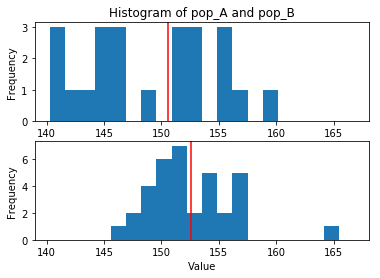

In [22]:
%matplotlib inline
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def plot_pop(a, b, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_plot(a, bins)
    plt.title('Histogram of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

plot_pop(pop_A, pop_B)    

Notice that the values of the distributions of these populations overlap quite a bit and the means are close. The question is, are these differences significant?  

You can now compute the two-sided t-test to determine if the difference of means is significant. A number of summary statistics are computed and printed for the test. 

The two-sided t-test is used to determine we can reject the null hypothesis that the difference of means is not significant. You can execute the t-test and see the results by executing the code in the cell below.

In [23]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   

test = t_test(pop_A, pop_B, 0.05)
test

DegFreedom    32.527186
Difference    -1.975956
Statistic     -1.359749
PValue         0.179172
Low95CI       -5.254211
High95CI       1.302298
dtype: float64

#### Examine these statistics noticing the following:
1. Difference in means is small.
2. The t-statistic is small and the p-value is large. Therefore, there is a high chance that the difference in means is from random variation alone. 
3. The 95% confidence interval straddles 0.  

Based on these statistics we cannot reject the null hypothesis. 

The code in the cell below makes a similar plot to the ones you have already created, but with the the upper and lower confidence bounds shown as dashed lines. Execute this code and examine the results. 

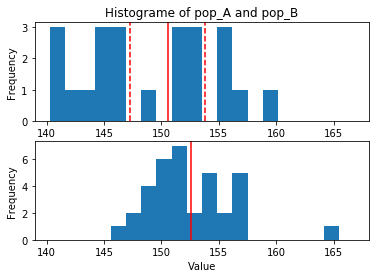

In [24]:
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
plot_t(pop_A, pop_B, test)    

Notice that the mean of the population in the lower plot is within the confidence interval of the difference of means of the populations. This confirms that we cannot reject the null hypothesis that there is no significant difference in these means. 

## Your Turn 2
In the previous example the difference of means was not significant. Now, you will repeat this analysis but with a slightly greater difference in means. Create two populations with means (`loc`) of `150` and `155`. Determine if this difference in means is significant using the `t_test` and `plot_t` functions.  

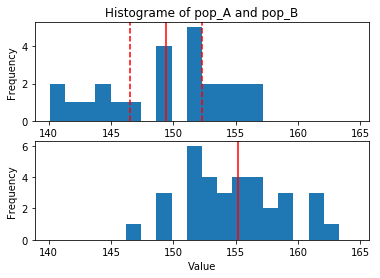

In [26]:
pop_C = norm.rvs(loc=150, scale=7, size=25) 
pop_D = norm.rvs(loc=155, scale=4, size=35) 

test2 = t_test( pop_C, pop_C, 0.05)  
plot_t(pop_C, pop_D, test2)   

#### Examine these results and answer the following questions:
1. Based on the t-statistic, p-value, and confidence interval, can you reject the null hypothesis? 
2. Does the mean of the second population fall within the confidence interval of the difference of means? 

### Power of Tests

The **power of a test** is formally defined as:

$$power = P(reject\ H_0| when\ H_a\ is\ true)$$

In plain language, the power of a test is the probability of getting a positive result when the null hypothesis is not true. Conversely, a test with insufficient power will not detect a real effect. Clearly, we want the most powerful test we can find for the situation. 

Computing test power can be a bit complex, and analytical solutions can be difficult or impossible. Often, a simulation is used to compute power. 

Let's look at the example of computation power for the two sample t-tests for the difference of means. The power of this test depends on the several parameters:

- The number of samples
- The anticipated difference in the population means, which we call the **effect**
- The significance level of the test
- The type of test

When running a power test, you can ask several questions that will assist you in designing an experiment. Usually, you will determine how big a sample you need to have good chance of rejecting the null hypothesis. You can also determine how big an effect needs to be given a fixed sample size (all the samples you have or can afford) to have a good chance of rejecting the null hypothesis. 

The Python `statsmodels` package provides power calculations for a limited set of hypothesis tests. We can use these capabilities to examine the power.

The code in the cell below does the following:

- Creates a sequence of effect sizes
- Computes a vector of power values for the effect size
- Plots the effect size vs. power

Execute this code and examine the result. 

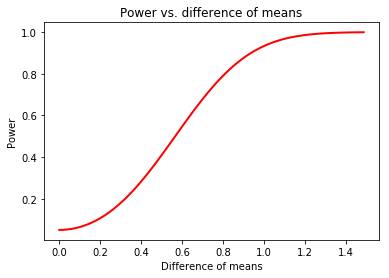

In [27]:
import statsmodels.stats.power as smsp
import numpy as np
nr.seed(seed=23344)
diffs = np.arange(start = 0.0, stop = 1.5, step = .015)
x = 25
powers = [smsp.tt_ind_solve_power(effect_size = x, nobs1 = 25, 
           alpha = 0.05, power = None, ratio = 1.0, alternative = 'two-sided') 
          for x in diffs]

def plot_power(x, y, xlabel, title):
    import matplotlib.pyplot as plt
    plt.plot(x, y, color = 'red', linewidth = 2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Power')
plot_power(diffs, powers, xlabel = 'Difference of means', title = 'Power vs. difference of means')    

Examine these results and notice how the power of the t-test rapidly increases as the difference in means increases. At a relatively small difference in means the power of the test is approaching 1.0, the maximum possible. 

## Your Turn 3
In the code cell below, compute and plot 100 values of test power for significance levels in the range $\{0.001, 0.25\}$. Set `n = 25`, `d = 1.0`, for the number of samples and the difference in means.
***

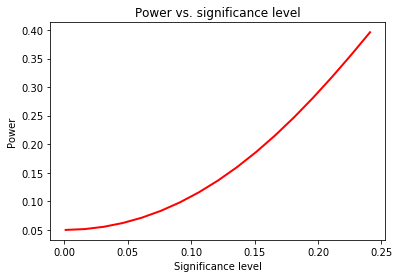

In [46]:
alphas = np.arange(start = 0.001, stop = 0.25, step = .015) # replace the ???
x = 1.0
powers = [smsp.tt_ind_solve_power(effect_size = x, nobs1 = 100, # replace the ???
           alpha = .05, power = None, ratio = 1.0, alternative = 'two-sided') 
          for x in alphas]
plot_power(alphas, powers, xlabel = 'Significance level', title = 'Power vs. significance level') 

#### Examine the plot you have created. 
At a significance level of 0.20 is the power of the t-test approaching 1.0?

***
## Your Turn 4
In the code cell below, compute and plot 100 values of test power for sample size in the range $\{1, 100\}$. Set `d = 1.0`, and `sig.level = 0.05`, for the difference in means and the significance level.
***

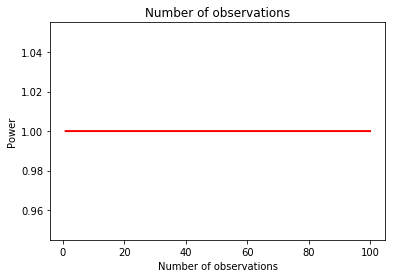

In [47]:
nobs = np.arange(start = 1, stop = 100, step = .015) # replace the ???
powers = [smsp.tt_ind_solve_power(effect_size = 1.0, nobs1 = 100, # replace the ???
           alpha = .05, power = None, ratio = 1.0, alternative = 'two-sided') 
          for x in nobs]
plot_power(nobs, powers, xlabel = 'Number of observations', title = 'Number of observations') 

#### Examine the plot you have created. 
The power of the t-test at 20 samples is approximately what value? 

### Tests on Galton's Height Data (1886)

Francis Galton published his seminal paper on the theory of regression in 1886. This paper has been enormously influential in statistics, as the linear regression model is still used today, although in a different form from Galton's approach. 

Galton showed that the heights of members of a family 'regress to the mean', and that the height of the parents does not determine the heights of their adult children. In this exercise, we will take a different approach to analyzing these data. We will use the t-test to compare the difference in means of the heights of parents and their adult children. 

As a first step, load the data from the .csv file provided and have a look at the first few rows of the data frame by executing the code in the cell below. 

In [48]:
import pandas as pd
GaltonFamilies = pd.read_csv('https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/GaltonFamilies.csv')
GaltonFamilies.head(10)

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5
5,002,75.5,66.5,73.66,4,2,male,72.5
6,002,75.5,66.5,73.66,4,3,female,65.5
7,002,75.5,66.5,73.66,4,4,female,65.5
8,003,75.0,64.0,72.06,2,1,male,71.0
9,003,75.0,64.0,72.06,2,2,female,68.0


This data set has 9 columns:
 1. A case or row number
 2. A unique code for each family in the sample
 3. The height of the father in inches
 4. The height of the mother in inches
 5. The average height of the parents
 6. The number of children in the family
 7. A code for the each unique child in the family
 8. The gender of the child
 9. The height of the adult child in inches 
 
 To analyze these data, we divide them into two groups based on the gender of the adult children. The code in the cell below divides the data set, plots two histograms to compare the heights of the two samples, and performs two-sided the t-test on difference of the means of these samples. 

DegFreedom     9.298860e+02
Difference     5.130122e+00
Statistic      3.137518e+01
PValue        4.681854e-148
Low95CI        4.810266e+00
High95CI       5.449979e+00
dtype: float64


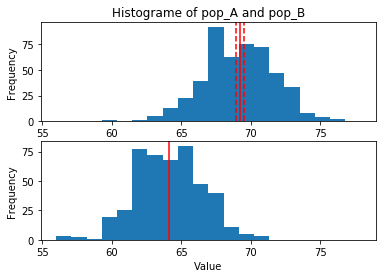

In [49]:
male = GaltonFamilies.loc[GaltonFamilies.loc[:, 'gender'] == 'male', 'childHeight']
female = GaltonFamilies.loc[GaltonFamilies.loc[:, 'gender'] == 'female', 'childHeight']

test_Galton = t_test(male, female, alpha = 0.05)
print(test_Galton)
plot_t(male, female, test_Galton)   

#### Examine these results, noticing the following:
1. The t-statistic is large, the p-value is small, and the confidence interval of the difference of the means does not overlap zero. We can reject the null hypothesis that the means are the same. There is a low chance that the difference in means is from random variation alone.
2. The mean of the second sample falls outside the confidence interval, confirming that there is a low chance that the difference in means is from random variation alone.

## Your Turn 5
Compute the t-statistics and plot the histograms for the difference in means of the fathers and their adult sons. It could be the case that children are taller than their parents. To test this idea, use the `alternative = 'larger'` argument of the `t_test` function. Using this argument defines a **one-sided t-test**.

DegFreedom    944.397284
Difference      0.096466
Statistic       0.605675
PValue          0.544873
Low95CI        -0.216098
High95CI        0.409029
dtype: float64


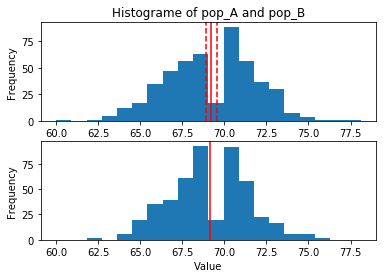

In [53]:
father = GaltonFamilies.loc[GaltonFamilies.loc[:, 'gender'] == 'male', 'father']
male = GaltonFamilies.loc[GaltonFamilies.loc[:, 'gender'] == 'male', 'childHeight']


Galton_men = t_test(male, father, alpha = 0.05, alternative = 'two-sided' )# replace the ???
print(Galton_men)
plot_t(male, father, Galton_men)   # replace the ???

#### Examine your results and anwer the following questions:
1. For the one-sided test, what is the upper bound on the confidence interval? 
2. Given the value of the t-statistic, the p-value, and the confidence interval, can you reject the null hypothesis? 

### Paired T-tests

There is also a version of the t-test for paired data. The heights of mothers and their adult sons is an example of paired data, since each son has a specific mother. Classically, paired tests are used to compare data from before and after a medical treatment.

Sometimes the paired t-test is referred to as the dependent t-test. The null hypothesis is that there is no change between after the treatment. 

Execute the code in the cell below and  examine the results.

DegFreedom     9.459687e+02
Difference     5.200832e+00
Statistic      3.949802e+01
PValue        6.323181e-153
Low95CI        4.887331e+00
High95CI       5.514333e+00
dtype: float64


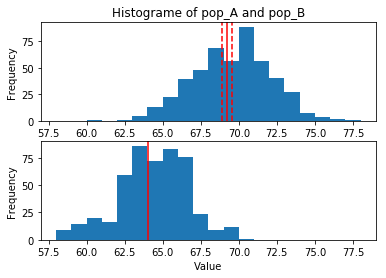

In [54]:
## Welche's test for paired data
def t_test_paired(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_rel(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   
mother = GaltonFamilies.loc[GaltonFamilies.loc[:, 'gender'] == 'male', 'mother']
Galton_paired = t_test_paired(male, mother, alpha = 0.05)
print(Galton_paired)
plot_t(male, mother, Galton_paired) 

***
## Your Turn 6
You have seen that we cannot reject the null hypothesis for a difference in means of the fathers and their sons, which was only about `0.1`. It could be that this is an issue with test power. 

In the code cell below use the `pwr.t2n.test` function to plot 100 values of the difference in means in the range $\{0.0, 1.0 \}$. The sample size arguments to this function are `n1 and n2`, and the `sig.level = 0.05`. 

Execute your code and examine the results. How big should the difference be to have a power or 0.9? 
***

In [ ]:
nobs = np.arange(start = 1, stop = 100, step = .015) # replace the ???
powers = [smsp.tt_ind_solve_power(effect_size = 1.0, nobs1 = 100, # replace the ???
           alpha = .05, power = None, ratio = 1.0, alternative = 'two-sided') 
          for x in nobs]
plot_power(nobs, powers, xlabel = 'Number of observations', title = 'Number of observations') 

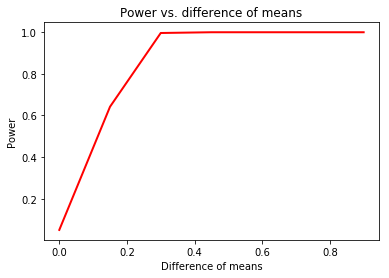

In [61]:
nsamps = len(male)
diffs = np.arange( start=0, stop= 1.0, step=.15 ) # fill in the parameters
powers = [smsp.tt_ind_solve_power(effect_size = x, nobs1 = nsamps, 
           alpha = .05, power = None, ratio = 1.0, alternative = 'two-sided')  # replace the ???
          for x in diffs]
plot_power(diffs, powers, xlabel = 'Difference of means', title = 'Power vs. difference of means')    

#### Examine your plot. 
With a difference in means of 0.3 approximately, what is the power of the test? 

## Tests for Categorical Data

So far, we have been investigating tests for data with continuous values. But, many data types are categorical when we work with count statistics. What tests can we apply to these?

### Pearson's Chi-Squared Test

One of the earliest tests for count data was developed by Karl Pearson around 1900. Despite its age, this test is still used today. The Pearson Chi-squared test (also written as $\chi$-squared) has the following properties:

- It is an unpaired test for counts in different categories:
  - These categories must be mutually exclusive. For example, does the patient have cancer? (yes/no)
  - Test if the two categories differ in WBC count
  - Rolling a die (1,2,3,4,5,6)
  - Test if the six categories occur the same (fair die)
  - Test if a tweet contains a specific word (yes/no)
  - Test if the two categories differ in tweet length or word count
- Tests if different categories differ in some specific value
- The chi-squared statistic depends on the ‘degrees of freedom’ of the test.
  - This is equal to n-1 where n equals the number of different categories.
- The test looks at the sum of the outcome differences from expectations.
- Chi-squared is also used for a ‘goodness of fit’ test to test if sample is representative of population.
  - Test if your sample has expected makeup of categories.
  - For example, if our population is 50-50 men-women, then we test if our sample is different from those expected probabilities.

The density of the $\chi$-squared distribution depends on the degrees of freedom.

![](https://library.startlearninglabs.uw.edu/DATASCI410/img/Chi-square.png)

As with any probability density function, confidence intervals and p-values can be computed. Notice that the $\chi$-squared distribution becomes flatter and with greater dispersion as the degrees of freedom increase. In practice, this means that you will need large samples to get a meaningful result if you have too many choices in your test. 

### Karl Pearson

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/Karl_Pearson_1912.jpg" title="Karl Pearson in 1912: A scary looking stats professor." alt="Pearson 1912" style="float: left; height: 200px; margin-right: 10px;" />
Karl Pearson was the dean of late 19th and early 20th century mathematical statisticians. Pearson was a student of Francis Gaulton, the inventor of the regression method. William Sealy Gossett was one of Pearsons's students. This relationship is said to be the inspiration for Gossett's pseudonym 'Student'. 


In many ways Pearson's influence on the mathematical foundations of statistics is still with us more than a century latter. Most unfortunately, Pearson was also a eugenicist and a racist. His misuse of statistics in this area tarnished his legacy.

### Building a Chi-squared Table

The traditional way to apply a chi-squared test is to first create a chi-squared table. In this example we are looking the results of an A-B test with three possible outcomes. For example, this type of test might be applied to determine if a new web site drives more customer purchases. 

The code in the cell below builds a simple chi-squared table. The columns in the data frame are:

- The actual occurrence of events
- The expected probability of these events; this is the distribution of the null hypothesis.
- The expected occurrence of events given the expected probabilities
- The difference between the occurrence and the expected number of events
- The square of the difference
- The squared difference normalized by the expected number of occurrences; the sum of these figures is the chi-squared statistic. 

Execute the code and examine the results. 

In [62]:
import pandas as pd
ab_data = pd.DataFrame({'Action':['Leave Page', 'Continue Purchase', 'Add More to Purchase'],
                       'occurrence':[55,43,22],
                       'expected_per':[0.6,0.3,0.1]})
sum_occurrence = ab_data.loc[:, 'occurrence'].sum()
ab_data.loc[:, 'expected_occurance'] = sum_occurrence * ab_data.loc[:, 'expected_per']
ab_data.loc[:, 'diff'] = ab_data.loc[:, 'occurrence'] - ab_data.loc[:, 'expected_occurance'] 
ab_data.loc[:, 'sqr_diff'] = ab_data.loc[:, 'diff'].apply(lambda x: x**2)
ab_data.loc[:, 'diff_expect'] = ab_data.loc[:, 'sqr_diff'].div(ab_data.loc[:, 'expected_occurance'], axis='index')
ab_data = ab_data.append({'Action': 'Totals',
                      'occurrence': sum_occurrence,
                       'expected_per':  [np.nan],
                      'expected_occurance': [np.nan],
                      'diff': [np.nan],
                      'sqr_diff': [np.nan],
                      'diff_expect': ab_data.loc[:, 'diff_expect'].sum()}, 
                        ignore_index =  True)
ab_data = ab_data[['Action', 'occurrence', 'expected_per', 'expected_occurance', 'diff', 'sqr_diff', 'diff_expect']]
ab_data                                       

,Action,occurrence,expected_per,expected_occurance,diff,sqr_diff,diff_expect
0,Leave Page,55,0.6,72,-17,289,4.013889
1,Continue Purchase,43,0.3,36,7,49,1.361111
2,Add More to Purchase,22,0.1,12,10,100,8.333333
3,Totals,120,[nan],[nan],[nan],[nan],13.708333


This chi-squared table is interpreted as follows:

- The $\chi$-squared test statistic is 13.708, which is computed as the sum of the squared differences normalized by the expected occurrences.
- The $\chi$-squared distribution has (3 outcomes - 1) = 2 degrees of freedom.
- Degree of freedom is the number of outcome options (3) minus 1.

Run the  code in the cell below to compute the p-value of the chi-squared test with the `scipy.stata.chi2.cdf` function.

In [63]:
import scipy.stats as ss
1 - ss.chi2.cdf(13.7, df = 2)

0.0010594556929076626

This p-value is rather small. Evidently, there is a small chance that the differences between the occurrences and expected occurrences are from random variation alone. 

In the foregoing example we computed the chi-squared statistic and p-value directly. In general, this is a somewhat cumbersome approach. Instead, we can use the `chisquare` function from the `scipy.stats` package as shown in the code below. Execute this code and examine the results. 

In [64]:
chisq, pvalue = ss.chisquare(ab_data.loc[:, 'occurrence'][:3], 
             ab_data.loc[:, 'expected_occurance'][:3])
print('Chi Squared statistic = ' + str(chisq))
print('P=value = ' + str(pvalue))

Chi Squared statistic = 13.708333333333334
P=value = 0.0010550504780913119


The difference between the expected and observed number of occurrences is significant. The large chi-squared value on 2 degrees of freedom and the small p-value indicate we can reject the null hypothesis that the observed occurrences follow the same distribution as the expected occurrences. There is a low chance that this difference occurs from random variation alone. 

Finally, we should check the power of our test. Execute the code in the cell below and examine the results. In this case, we will use the `power_divergence` function from the `scipy.stats` package. Execute this code to determine if this test has reasonable power.

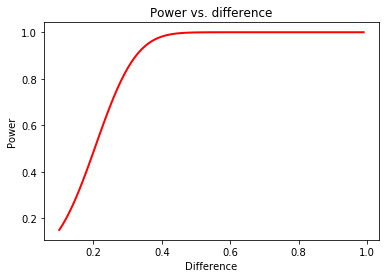

In [65]:
import statsmodels.stats.power as ssp
diffs = np.arange(start = 0.1, stop = 1.0, step = 0.01) 
powers = ssp.GofChisquarePower().solve_power(effect_size = diffs, nobs=120, n_bins = 3, alpha=0.05)
plot_power(diffs, powers, xlabel = 'Difference', title = 'Power vs. difference') 

Apparently, this test is quite powerful, and we could have detected much smaller differences between the observed and expected counts. 

## Your Turn 7
As you have observed, the test is quite powerful with 120 observations. But, what if we do not have a sample this large? 
Compute and plot the power of the chi-squared test for an **effect size of 1.0** at sample sizes in the range $\{ 10, 100\}$. The `nobs` argument to the `GofChisquarePower` is the sample size. 

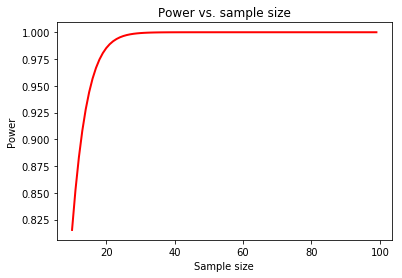

In [66]:
samples = np.arange( 10,100,1                        ) # fill in parameters
powers = ssp.GofChisquarePower().solve_power(effect_size = 1, 
                                             nobs = samples, 
                                             n_bins = 3, 
                                             alpha=0.05) # replace ???
plot_power(samples, powers, xlabel = 'Sample size', title = 'Power vs. sample size') 

#### Examine your results. 
At a sample size of 30 is the power of the test approximately 1.0?

### Fisher's Exact Test

The assumptions behind the chi-squared statistic break down when the sample size is small (e.g., number of occurrences $\le 10$). In this case you can use Fisher's exact test. In practice, Fisher's exact test is rarely used, but it is interesting to think about it, anyway. 

According to the story, in 1911 Ronald Fisher worked in the same institution with a talented aquatic botanist, Dr. Muriel Bristol, who was quite particular about how her tea was served. Dr. Bristol told Fisher that she could tell the difference between cups of tea where the milk had been poured into the cup before or after the tea was poured. 

Fisher, was a bit skeptical. He challenged Dr. Bristol to a test. In the test Fisher prepared eight cups of tea. Four of the cups of where prepared in Dr. Bristol's preferred manner and the other four the other way. The tea was prepared out of sight of Dr. Bristol. However, she knew that there were four cups prepared each way. The order of preparation of each cup of tea was randomized. Fisher served the cups of tea to Dr. Bristol and asked her how the tea had been poured. In every case, she was correct!

Fisher devised a **permutation test** to determine the likelihood that Dr Bristol could have simply guessed the correct outcome. He devised the following permutation table for the chances of success:

![](https://library.startlearninglabs.uw.edu/DATASCI410/img/tea.png)

The possible permutations of possible ways that Dr Bristol could have correctly (success) or incorrectly identified the way each cup of tea was prepared:

$$\frac{8!}{4!(8-4)!} = 70$$

So, the chance that the Dr Bristol could purely guess (by random chance) the outcome is only 1 in 70 or about 1.4%. 

Let's try an example of Fisher's exact test. Take a simple 2X2 matrix of counts. The counts are number of success and failures for two samples (two sets of Bernoulli trials) on the number of sharks observed in two oceans over some period of time. Run the code in the cell below to apply the Fisher exact test to these counts.  

In [ ]:
mat_test = pd.DataFrame(np.array([[8,2],[1,5]]),
                       index = ['wales', 'sharks'],
                       columns = ['Atlantic', 'Indian'])
print(mat_test)
oddsratio, pvalue = ss.fisher_exact(mat_test)
print('\nOddsratio = ' + str(oddsratio))
print('P-value = ' + str(pvalue))

In this case, we can reject the null hypothesis. Evidently the difference of counts of whales and sharks in the two oceans from this experiment is unlikely to arise by chance alone. 

## Hypothesis Testing Summary

- If data is normal:
  - If you know population mean and variance, use standard normal ‘z-test’.
  - If you just know population mean, use t-test.
  - If you don't know the mean and variance, use Welch’s t-test.
  - Test for paired and unpaired data.
- For categorical comparison tests,
  - If the sample/subgroup size is large enough, use chi-squared test
  - If the sample/subgroup size is small, use Fisher’s exact test.


## Supplementary Material

If you need some review of the concepts of classical statistics there are numerous good books available. Two particularly non-mathematical and readable books are shown below. These books have distinct and different styles. If you do not like one, you might like the other. Or, you may benefit from reading both. 

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/StatsDoneWrong.jpg" title="Reinhart, 2015" alt="Reinhart's book" style="float: left; height: 200px; margin-right: 10px;"/><img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/p-value.jpg" title="Vicker, 2009" alt="Vicker's book" Style="float: right; height: 200px; margin-left: 10px;" />
Alex Reinhart's book, *Statistics Done Wrong, a woefully complete guide*, No Starch Press, 2015, disscusses clasical statistical tests using numerous clever examples. 

Andrew Vicker's *What is a P-Value Anyway*, Pearson, 2009, is perhaps the most humorous statistics book ever writen; admittedly a category with little competition. The treatment is a bit broader than Reinhart's book. 




<div id="reminder" style="border-radius: 5px; background-color:#f5f5f5;" >
<h3>Reminder</h3>
<p>Use this notebook to answer the quiz questions related to the <b>Your Turn</b> sections.<p>
</div>